# 니프티(Nifti)란?

대부분의 신경영상 패키지가 지원하는 표준화 형식. 따라서 일반적으로 fMRI 전처리 파이프라인의 첫 단계가 nifti로 변환하는 것.
`dcm2niix` 패캐지 추천

여러 소프트웨어가 있는데 Python에서도 가능하며, numpy배열로 변환할 수 있기 때문에 장점이 있다.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [13]:
# 실제 참가자 데이터
mri = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
img = nib.load(mri)

# t1 데이터
anat = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz'
img_anat = nib.load(anat)

In [14]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [15]:
print(img.shape) # x,y,z, 65,77,65 , 275초

(65, 77, 65, 275)


In [16]:
print(img_anat.shape)

(193, 229, 193)


# Nifti 이미지의 세부분

1. 메타데이터 포함된 header
2. 이미지 데이터;
3. 아핀 행렬

## header
측정 단위, 복셀 크기와 같은 스캔에 대한 메타 데이터가 포함되어 있다.

In [9]:
hdr = img.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  65  77  65 275   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 3. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2034.6685
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.6.4).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.5
q

In [11]:
# 복셀 크기 반환
# 해당 영상은 3mm크기, 2초마다
hdr.get_zooms() 

(3.0, 3.0, 3.0, 2.0)

In [12]:
# 측정단위 반환
hdr.get_xyzt_units()

('mm', 'sec')

## 이미지 데이터
데이터 로드하고 객체 생성할 때 실제로는 아직 메모리의 실제 nifti 데이터를 로드하지 않는다.
이는 메모리를 많이 사용하는 작업이기 때문에..
이미지 로드 연기하면 메모리에 모든 데이터 로드하지 않고도 이미지 크기 엿볼 수 있음.

어쨋든 데이터 실제로 로드하려면 `get_fdata()`이미지 데이터와 동일한 크기의 numpy 배열을 반환하는 메서드 호출 가능.
우선 여기서 **T1** 이미지로 한번 보겠다.

In [20]:
img_data = img.get_fdata()
print(type(img_data))
print(img_data.shape)

<class 'numpy.ndarray'>
(65, 77, 65, 275)


In [21]:
# 아래 결과 처럼 우리가 이 4D 배열을 인쇄했을 때 (65 x 77 x 65 x 275)
# 0만 나오는 이유는 각 차원의 첫, 마지막 숫자 두개가 뇌와 관련된 신호가 아니라 빈공간만 포함해서.

print(img_data)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 

In [25]:
# 120초의 중간 복셀 3 x 3 x 3 값
mid_vox = img_data[31:34, 37:40, 31:34, 120]
print(mid_vox)

[[[564.96316721 844.41766345 821.28761126]
  [613.42761212 859.7549061  811.72511989]
  [631.86955976 827.31073895 832.24721988]]

 [[471.04584123 795.42541869 888.16295677]
  [426.58646576 747.02306788 886.57955723]
  [353.34647502 665.64875007 875.71308976]]

 [[677.81919363 894.9622607  887.51096872]
  [589.14881909 825.7894335  922.09738232]
  [475.20614592 654.2234357  913.21792605]]]


여기서 보인 신호들이 좋다 나쁘다라고 아직 할 수 없다. 신호 강도의 정확한 척도를 아직 모르기 때문

다른이미지와 마찬가지로 숫자를 plotting하고 색상을 할당하여 시각화 할 수 있다.
**중요한 것은 데이터가 3D이기 때문에 여기에 있는 데이터를 2D로 직접 plotting할 수는 없고 단일 슬라이스를 플롯할 수 있다**

In [32]:
mid_slice_x = img_data[32, :, :, 120]
print(mid_slice_x.shape)

(77, 65)


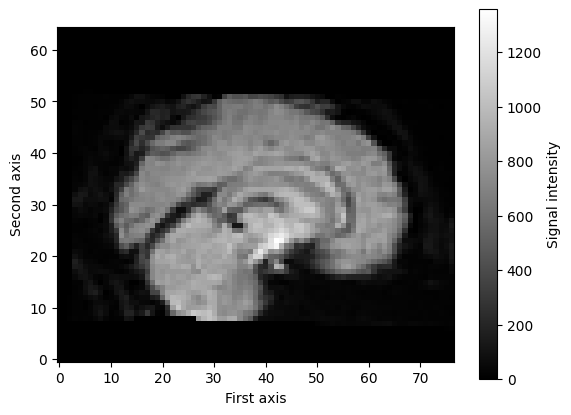

In [35]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates. lower안해주면 거꾸로 나옴.
plt.imshow(mid_slice_x.T, cmap='gray',  origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')

그런데 fMRI 데이터는 시간 차원도 있어서, 시간차원에서도 볼 수 있다.
예를 들어, 단일 복셀의 시계열을 추출하고 시간에 따른 해당 복셀의 신호 강도값을 표시할 수 있다.
먼저 하나의 특정 복셀의 시계열을 추출해 보자.

In [37]:
mid_vox_ts = img_data[32, 39, 32, :]
print('Voxel timeseries shape : %s'%(mid_vox_ts.shape))

Voxel timeseries shape : 275


시각화 할 건데, 너무 기니까 20개 시점에 걸쳐 해보자. 빨간색 상자가 우리가 선택한 voxel이다.

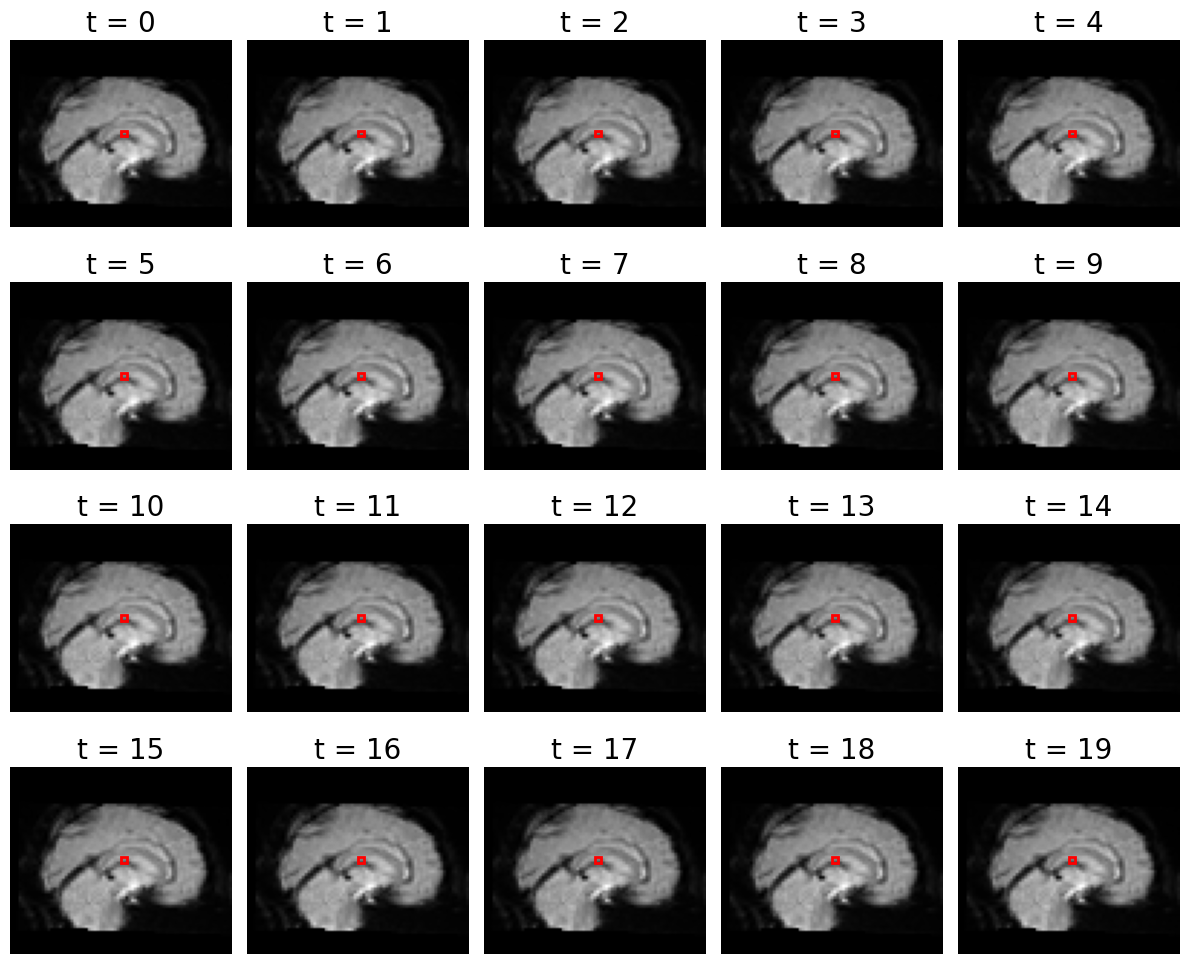

In [49]:
from matplotlib import patches

fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(12,10)) # 20개 시간
# 반복하여 표시
for t, ax in enumerate(axes.flatten()):
    ax.imshow(img_data[32,:,:,t].T, cmap='gray', origin='lower')
    rect = patches.Rectangle((38,31),2,2,linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()

이렇게 보면 사실 뭐가 다른지 잘 모른다. 애초레 fMRI의 활동 변동이 매우 작아서 그렇기도 하다.
보통 평균 활동에 비해 1~3%에 불과하다고 한다.
실제로 시계열 데이터를 직접 plotting 해보자.

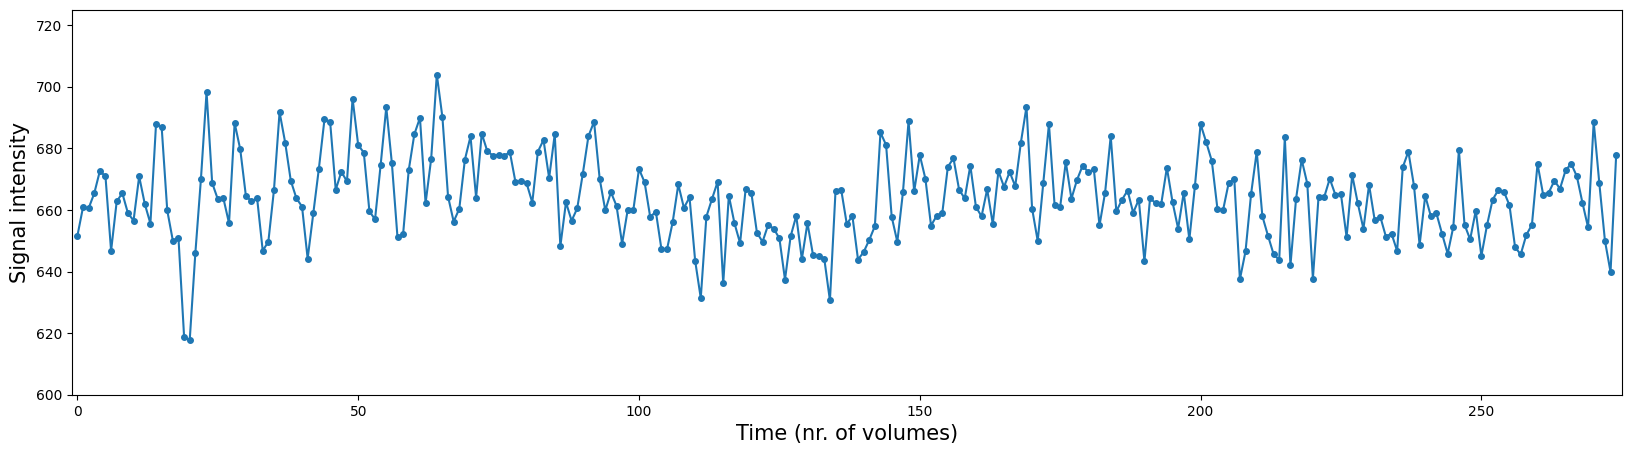

In [53]:
plt.figure(figsize=(20, 5))
plt.plot(mid_vox_ts, 'o-', ms=4)
plt.xlim(-1, mid_vox_ts.size)
plt.ylim(600, 725)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.show()

## 아핀
각 nifti 파일은 메타데이터 외에도 이미지 좌표의 위치를 실제 단어 좌표와 연결하는 아핀 행렬도 포함되어 있다.(요즘엔 안그런 것도 있는 거 같음)

우선 우리가 nifti 파일을 받았다고 할 때, 뇌 스캔인지 여부도 알 수 없으니까 세축 각각에서 하나씩 세개의 슬라이스를 플롯해보기로 했다고 칩시다.


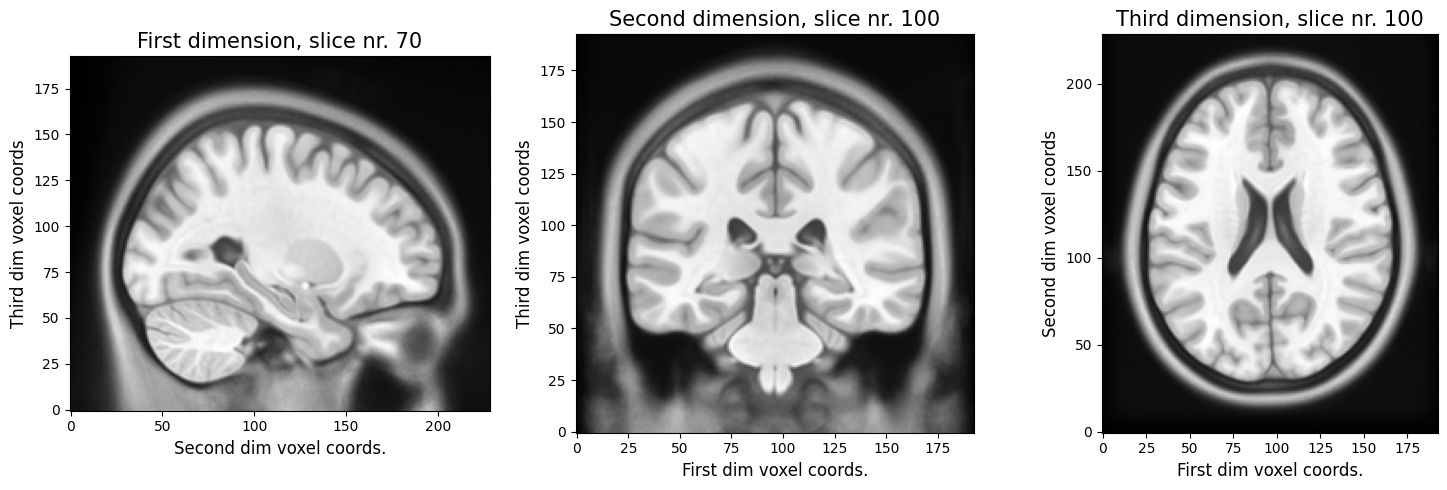

In [54]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_anat_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(img_anat_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(img_anat_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

이러면 우리는 우선 T1이미지(구조적 이미지 스캔)이라는 것을 알았다.
문제는 우리가 첫 이미지를 볼때 이게 왼이냐 오이냐?를 알 수 없다.
이때 아핀을 쓰는거다!

우선 실제 공간은 스캐너의 등중심(0,0,0)을 기준으로 한 복셀의 위치(mm)을 나타낸다.
더욱이 nibable은 nifti 첫 번째 축이 왼쪽에서 오른쪽으로 가고, 두 번째 축이 뒤에서 앞으로 가고, 세 번째 축이 아래에서 위로 간다고 가정한다.
이 규칙의 약어는 **RAS+**다. 
이는 기본적으로 등중심의 오른쪽, 앞쪽, 위쪽 좌표가 양수여야함을 나타낸다. 반대는 음수

아핀을 어케 사용하냐? 간단한 행렬 계산이면 된다.
복셀 좌표 (i,j,k)가 있을 경우 단일 요인 1이 추가된 후 [i,j,k,1] 열 백터가 되어 4x4아핀 행렬 A와 내적을 통해 RAS+의 실제 단어 좌표를 얻을 수 있다.
자 그럼 아핀이 실제로 4x4행렬인지 보자.

In [59]:
np.set_printoptions(suppress=True, precision=3)
A = img_anat.affine
print(A)

[[   1.    0.    0.  -96.]
 [   0.    1.    0. -132.]
 [   0.    0.    1.  -78.]
 [   0.    0.    0.    1.]]


이제 여기서 가장 왼쪽 그림이 단면의 왼쪽인이 오른쪽인지 알고 싶다면..?
x 복셀 좌표에 대한 지표 i=69, 나머지는 중간 선택.

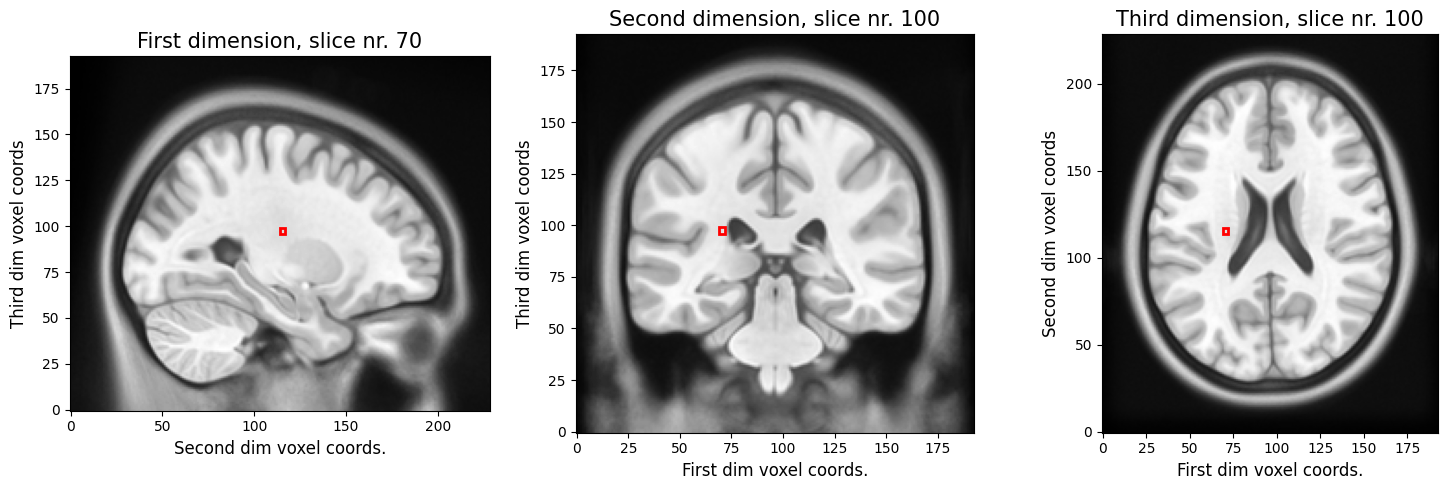

In [60]:
import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_anat_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)
rect = patches.Rectangle((114, 96), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)

ax[1].imshow(img_anat_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 96), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect)

ax[2].imshow(img_anat_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)
rect = patches.Rectangle((69, 114), 3, 3, linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect)

fig.tight_layout()

이렇게 보면 첫 사진이 왼쪽인걸 알겠죠?
실제 좌표 얻으려면 아래와 같이 하면 된다.

In [63]:
xyz1 = A @ np.array([69,114,96,1])
print(xyz1)

[-27. -18.  18.   1.]


x좌표가 -27이니까 이 좌표가 등중심정 왼쪽으로 27mm 에 있음을 의미
근데 이게 중요하냐..?

실제 모델을 돌리거나 할때는 아닐 수 있지만, 시각화와 보고에 있어서는 그렇다.
특정 실험에서 편도체를 논문에 쓰는데 왼쪽인지 오른쪽인지 알고 싶다면? 위처럼 하여서 알아보면 된다.